<center><h2>Artificial and Computational Intelligence (Assignment - 2)</h2></center>

## Problem Statement

As part of the 2nd Assignment, we'll implement Bayesian Networks and also learn to use the pomegranate library.

You are required to create a bayesian network model which would help you predict the probability. The detailed problem description is attached as a PDF as a part of this assignment along with the marking scheme.  

### What is a Bayesian Network ?

A Bayesian network, Bayes network, belief network, decision network, Bayes(ian) model or probabilistic directed acyclic graphical model is a probabilistic graphical model (a type of statistical model) that represents a set of variables and their conditional dependencies via a directed acyclic graph (DAG). 

Bayesian networks are ideal for taking an event that occurred and predicting the likelihood that any one of several possible known causes was the contributing factor. For example, a Bayesian network could represent the probabilistic relationships between diseases and symptoms. Given symptoms, the network can be used to compute the probabilities of the presence of various diseases. 

### Dataset

The dataset is attached with the assignment as excel & can be converted to .csv 

#### Dataset Description
##### Sample Tuple

Y	won	5wickets	lost	2nd	vWest_Indies	Home	6-Nov-11

##### Explanation
- The first column represents if Ashwin was in the playing 11 or not. 
- The second column represents the Result of the match . win indicates India won the match.
- The third column represents the Margin of victory / losss.
- The fourth column represents the results of the toss. won indicates India won the toss. 
- The fifth column represents the batting order. If India batted 1st or 2nd. 
- The sixth column represents the opponent.
- The seventh column represents the location of the match. If the match was held in Home(India) or away. 
- The last column represents the start date of the match.


### Evaluation
We wish to evaluate based on 
- coding practices being followed
- commenting to explain the code and logic behind doing something
- your understanding and explanation of data
- how good the model would perform

## BITS RollNumbers , Names. 

Sandeep Kumar

## Import libraries

In [1]:
%config Completer.use_jedi = False

In [2]:
%matplotlib inline

In [20]:
import pandas as pd
import numpy as np

## Read data

In [4]:
df = pd.read_excel('./India_Test_Stats.xlsx')

In [5]:
df

,Ashwin,Result,Margin,Toss,Bat,Opposition,Location,Start Date,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,Y,won,5 wickets,lost,2nd,v West Indies,Home,2011-11-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Y,won,inns & 15 runs,won,1st,v West Indies,Home,2011-11-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Y,draw,-,lost,2nd,v West Indies,Home,2011-11-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Y,lost,122 runs,lost,2nd,v Australia,Away,2011-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Y,lost,inns & 68 runs,won,1st,v Australia,Away,2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Pre-process data (Whatever you feel might be required)

In [10]:
df = df.loc[~df.Ashwin.isna(), df.columns[:8]]

In [11]:
df

,Ashwin,Result,Margin,Toss,Bat,Opposition,Location,Start Date
0,Y,won,5 wickets,lost,2nd,v West Indies,Home,2011-11-06
1,Y,won,inns & 15 runs,won,1st,v West Indies,Home,2011-11-14
2,Y,draw,-,lost,2nd,v West Indies,Home,2011-11-22
3,Y,lost,122 runs,lost,2nd,v Australia,Away,2011-12-26
4,Y,lost,inns & 68 runs,won,1st,v Australia,Away,2012-01-03
...,...,...,...,...,...,...,...,...
80,Y,won,203 runs,won,1st,v South Africa,Home,2019-10-02
81,Y,won,inns & 137 runs,won,1st,v South Africa,Home,2019-10-10
82,Y,won,inns & 202 runs,won,1st,v South Africa,Home,2019-10-19
83,Y,won,inns & 130 runs,lost,2nd,v Bangladesh,Home,2019-11-14


<AxesSubplot:>

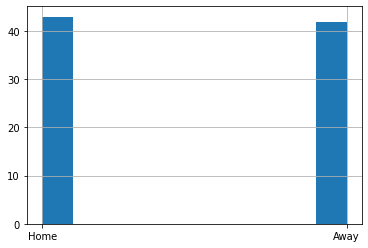

In [16]:
df.Location.hist()

<AxesSubplot:>

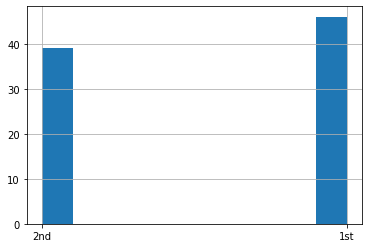

In [17]:
df.Bat.hist()

<AxesSubplot:>

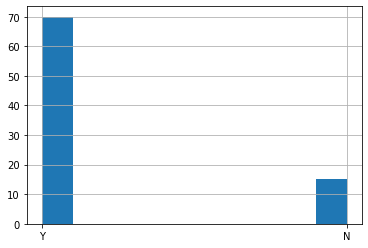

In [18]:
df.Ashwin.hist()

<AxesSubplot:>

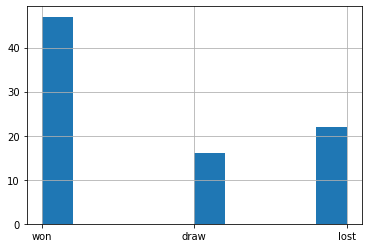

In [19]:
df.Result.hist()

## Data Description

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 0 to 84
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Ashwin      85 non-null     object        
 1   Result      85 non-null     object        
 2   Margin      85 non-null     object        
 3   Toss        85 non-null     object        
 4   Bat         85 non-null     object        
 5   Opposition  85 non-null     object        
 6   Location    85 non-null     object        
 7   Start Date  85 non-null     datetime64[ns]
dtypes: datetime64[ns](1), object(7)
memory usage: 6.0+ KB


## Construction of Bayesian Network goes here 

### Solution for part 1 

In [33]:
def prior_probability(arr):
    unique, counts = np.unique(np.array(arr), return_counts=True)
    return {
        a: c/len(arr) for a,c  in zip(unique, counts)
    }

In [34]:
prior_probability(df.Result)

{'draw': 0.18823529411764706,
 'lost': 0.25882352941176473,
 'won': 0.5529411764705883}

## Solution for part 2 

In [42]:
def posterior_probability(arr1, arr2):
    store = []
    unique1 = np.unique(np.array(arr1))
    unique2 = np.unique(np.array(arr2))
    for u1 in unique1:
        for u2 in unique2:
            pp = ((arr1 == u1) & (arr2 == u2)).sum()/(arr1 == u1).sum()
            store.append([u1, u2, pp])
    return store

In [43]:
posterior_probability(df.Ashwin, df.Result)

[['N', 'draw', 0.2],
 ['N', 'lost', 0.4666666666666667],
 ['N', 'won', 0.3333333333333333],
 ['Y', 'draw', 0.18571428571428572],
 ['Y', 'lost', 0.21428571428571427],
 ['Y', 'won', 0.6]]

## Solution for part 3 

In [ ]:
#Solution for part 4
# a)
# b) 
# c)
# d) 

In [ ]:
#Feel free to add cells where necessary. 

<h3><center> Happy Coding!</center></h3>